<a href="https://colab.research.google.com/github/mugdha711/MLAP-Class/blob/master/3A)_ASSOCIATIVE_RULES_RECCOMENDATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  # Import all required libraries
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
df = pd.read_csv("/content/GroceryStoreDataSet.csv")

In [4]:
df.head()

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


In [6]:
df.shape

(19, 1)

In [7]:
df.columns.size

1

In [8]:
# unique column 
unique_row_items = []
for index, row in df.iterrows():
    items_series = list(row.str.split(','))
    for item_serie in items_series:
        for item in item_serie:
            if item not in unique_row_items:
                unique_row_items.append(item)
    


unique_row_items

['BREAD',
 'MILK',
 'BISCUIT',
 'CORNFLAKES',
 'TEA',
 'BOURNVITA',
 'JAM',
 'MAGGI',
 'COFFEE',
 'COCK',
 'SUGER']

In [9]:
df_apriori = pd.DataFrame(columns=unique_row_items)
#df_apriori.at[0,'JAM'] = 1
#df_apriori.at[1,'JAM'] = 1
df_apriori


,BREAD,MILK,BISCUIT,CORNFLAKES,TEA,BOURNVITA,JAM,MAGGI,COFFEE,COCK,SUGER


In [10]:
# one hot encoding
for index, row in df.iterrows():
    items = str(row[0]).split(',')
    #print(items)
    one_hot_encoding = np.zeros(len(unique_row_items),dtype=int)
    for it in items:
        for i,column in enumerate(df_apriori.columns):
            #print(i,column,it)
            if it == column:
                one_hot_encoding[i] = 1
    df_apriori.at[index] = one_hot_encoding
    #print(one_hot_encoding)

In [11]:
df_apriori

,BREAD,MILK,BISCUIT,CORNFLAKES,TEA,BOURNVITA,JAM,MAGGI,COFFEE,COCK,SUGER
0,1,1,1,1,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,0
3,0,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,1,0,0,1,0,0,0
6,1,0,1,0,1,0,0,1,0,0,0
7,1,0,0,0,1,0,1,1,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,1,1,0


In [12]:
df_apriori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BREAD       19 non-null     object
 1   MILK        19 non-null     object
 2   BISCUIT     19 non-null     object
 3   CORNFLAKES  19 non-null     object
 4   TEA         19 non-null     object
 5   BOURNVITA   19 non-null     object
 6   JAM         19 non-null     object
 7   MAGGI       19 non-null     object
 8   COFFEE      19 non-null     object
 9   COCK        19 non-null     object
 10  SUGER       19 non-null     object
dtypes: object(11)
memory usage: 2.4+ KB


In [13]:
df_apriori=df_apriori.astype('int')

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
freq_items = apriori(df_apriori, min_support = 0.2, use_colnames = True)#, verbose = 1)

In [19]:
freq_items

,support,itemsets
0,0.631579,(BREAD)
1,0.210526,(MILK)
2,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.368421,(TEA)
5,0.210526,(BOURNVITA)
6,0.263158,(MAGGI)
7,0.421053,(COFFEE)
8,0.315789,(SUGER)
9,0.210526,"(TEA, BREAD)"


In [20]:
freq_items.head()

,support,itemsets
0,0.631579,(BREAD)
1,0.210526,(MILK)
2,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.368421,(TEA)


In [21]:
df_association_rules = association_rules(freq_items, metric = "confidence", min_threshold = 0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
1,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
3,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
7,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
8,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
9,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421


In [22]:
df_association_rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
2,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
8,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
0,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
6,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
9,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
1,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
3,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316


In [23]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
1,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
3,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
7,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
8,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
9,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421


In [24]:
df_association_rules["antecedents"].apply(lambda x: str(x))

0           frozenset({'TEA'})
1         frozenset({'BREAD'})
2         frozenset({'SUGER'})
3         frozenset({'BREAD'})
4        frozenset({'COFFEE'})
5    frozenset({'CORNFLAKES'})
6           frozenset({'TEA'})
7         frozenset({'MAGGI'})
8         frozenset({'SUGER'})
9        frozenset({'COFFEE'})
Name: antecedents, dtype: object

In [30]:
cols = ['antecedents','consequents']
df_association_rules[cols] = df_association_rules[cols].applymap(lambda x: tuple(x))
print (df_association_rules)

     antecedents    consequents  ...  leverage  conviction
0         (TEA,)       (BREAD,)  ... -0.022161    0.859649
1       (BREAD,)         (TEA,)  ... -0.022161    0.947368
2       (SUGER,)       (BREAD,)  ...  0.011080    1.105263
3       (BREAD,)       (SUGER,)  ...  0.011080    1.026316
4      (COFFEE,)  (CORNFLAKES,)  ...  0.077562    1.368421
5  (CORNFLAKES,)      (COFFEE,)  ...  0.077562    1.736842
6         (TEA,)       (MAGGI,)  ...  0.113573    1.719298
7       (MAGGI,)         (TEA,)  ...  0.113573    3.157895
8       (SUGER,)      (COFFEE,)  ...  0.077562    1.736842
9      (COFFEE,)       (SUGER,)  ...  0.077562    1.368421

[10 rows x 9 columns]


In [31]:
df_association_rules = (df_association_rules.explode('antecedents')
         .reset_index(drop=True)
         .explode('consequents')
         .reset_index(drop=True))

In [32]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,TEA,BREAD,0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
1,BREAD,TEA,0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,SUGER,BREAD,0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
3,BREAD,SUGER,0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
4,COFFEE,CORNFLAKES,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,CORNFLAKES,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,TEA,MAGGI,0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
7,MAGGI,TEA,0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
8,SUGER,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
9,COFFEE,SUGER,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421


In [33]:
df_association_rules["product_group"] = df_association_rules["antecedents"].apply(lambda x: str(x)) + "," + df_association_rules["consequents"].apply(lambda x: str(x))

In [34]:
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,product_group
0,TEA,BREAD,0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649,"TEA,BREAD"
1,BREAD,TEA,0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368,"BREAD,TEA"
2,SUGER,BREAD,0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263,"SUGER,BREAD"
3,BREAD,SUGER,0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316,"BREAD,SUGER"
4,COFFEE,CORNFLAKES,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,"COFFEE,CORNFLAKES"
5,CORNFLAKES,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,"CORNFLAKES,COFFEE"
6,TEA,MAGGI,0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298,"TEA,MAGGI"
7,MAGGI,TEA,0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895,"MAGGI,TEA"
8,SUGER,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,"SUGER,COFFEE"
9,COFFEE,SUGER,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,"COFFEE,SUGER"


In [35]:
df1 = df_association_rules.loc[:,["product_group","confidence","lift"]].sort_values("confidence",ascending=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


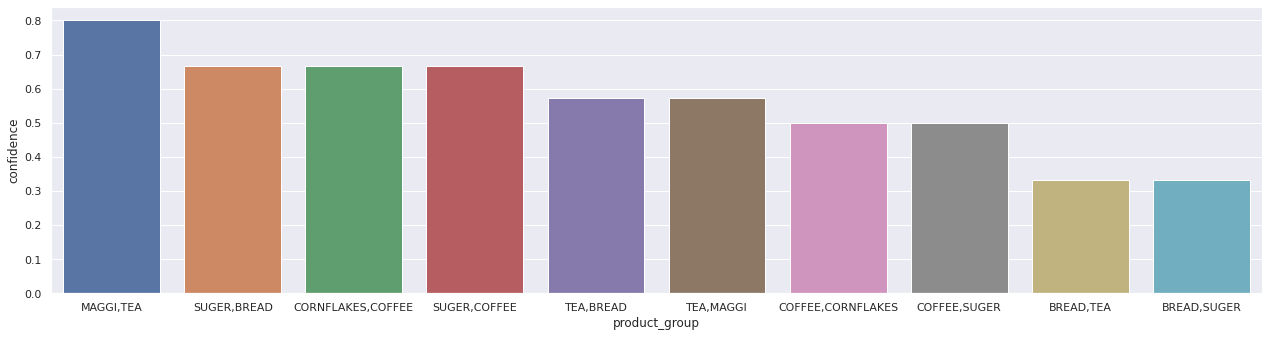

In [36]:
import seaborn as sns
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="product_group",y="confidence",data=df1);

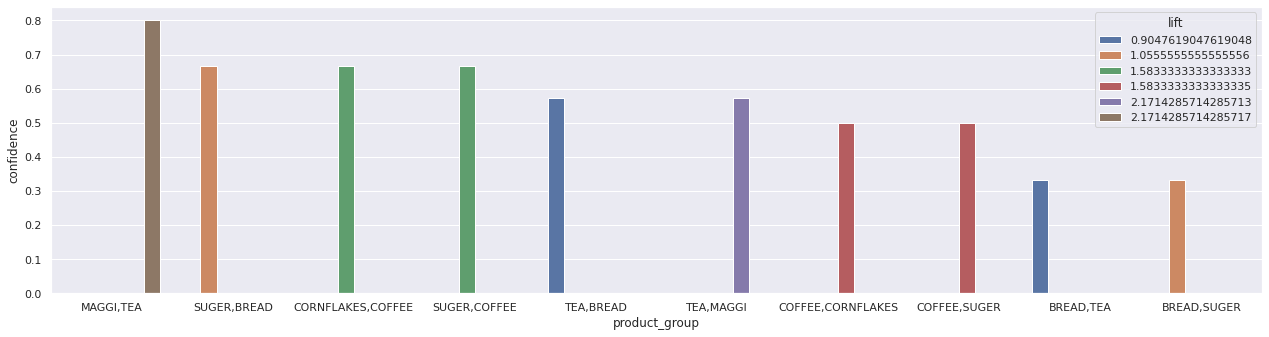

In [37]:
import seaborn as sns
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
sns.barplot(x="product_group",y="confidence",hue="lift",data=df1);

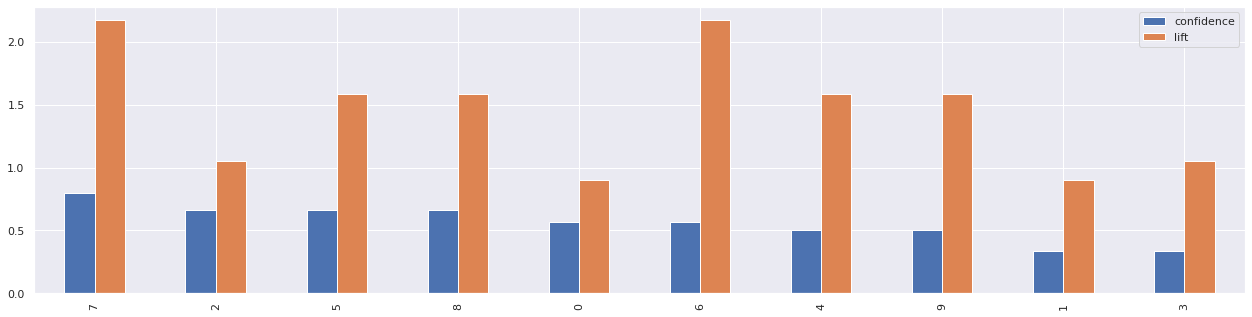

In [38]:
df1.plot.bar()